<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/16_CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR10
- 10 개의 각각의 이밎들이 존재하고 32*32*3의 작은 컬러 데이터들로 구성이 되어 있다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10964617256491905039
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17499210362994483834
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [2]:
cifar10=tf.keras.datasets.cifar10
(x_train,t_train),(x_test,t_test)=cifar10.load_data()

x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

print(x_train.shape)
print(x_test.shape)

x_train,x_test=x_train.astype(np.float32)/255.,x_test.astype(np.float32)/255.

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
cnn=Sequential()

cnn.add(Conv2D(input_shape=(32,32,3),kernel_size=(3,3),filters=32,activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax')) 

In [10]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

hist=cnn.fit(x_train,t_train,batch_size=128,epochs=30,validation_data=(x_test,t_test))

Epoch 1/30
391/391 [==============================] - 16s 13ms/step - loss: 1.6695 - accuracy: 0.3909 - val_loss: 1.2636 - val_accuracy: 0.5518
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.3327 - accuracy: 0.5255 - val_loss: 1.1337 - val_accuracy: 0.6089
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 1.1995 - accuracy: 0.5744 - val_loss: 1.0569 - val_accuracy: 0.6298
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1205 - accuracy: 0.6061 - val_loss: 1.0162 - val_accuracy: 0.6479
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0613 - accuracy: 0.6244 - val_loss: 0.9390 - val_accuracy: 0.6671
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0029 - accuracy: 0.6448 - val_loss: 0.9374 - val_accuracy: 0.6666
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9655 - accuracy: 0.6573 - val_loss: 0.9237 - val_accuracy: 0.672

In [11]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9363 - accuracy: 0.7100


[0.9362658262252808, 0.7099999785423279]

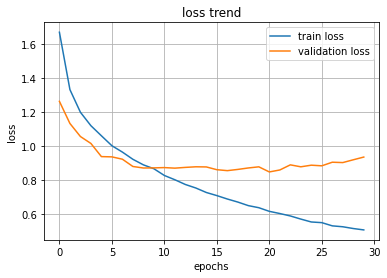

In [12]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()


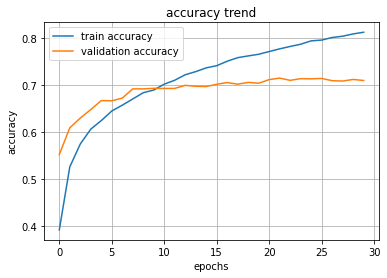

In [13]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()

#$$ CNN의 성능 향상 (오버피팅\Downarrow 정확도 \Uparrow )$$
* 더 많은 레이어 쌓기
  * 컨볼루션 레이어가 중첩된 더 깊은 구조가 될수록 성능은 크게 개선됨

* 이미지 데이터 보강 (Iamge Data Augmentation)
  * 딥러닝에서는 많은 학습 데이터를 사용하면 성능을 개선 시킬 수 있음

* 높은 해상도(High Resolution)학습 데이터 확보
  * 동일한 CNN구조 라면 높은 해상도의 학습데이터를 통해서 성능을 개선 시킬 수 있음

* L1 Norm,L2 Norm등의 가중치 규제(Regularization),Dropout, 배치 정규화(Batch Normalization) 등을 통해 성능을 개선 가능